## Lake Zug CTD Planning (28.01.2026)

In [1]:
# imports
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
bathy = xr.open_dataset('Q:/Messdaten/Aphys_Hypothesis_data/Zugersee/bathymetry.nc')

In [12]:
# planned locations
profile_locs = pd.DataFrame({
    'name': ["P02", "P03", "P05'", "P06", "P06W", "P06E", "P09"],
    'xsc': [679803, 679663, 679322, 680030, 679884, 680328, 680409],
    'ysc': [222690, 221650, 219531, 218872, 218764, 218866, 217437]
})

profile_locs['xsc'] += int(2e6)
profile_locs['ysc'] += int(1e6)

profile_locs['total_depth'] = [bathy.sel(xsc=row.xsc, ysc=row.ysc).depth.item() for _, row in profile_locs.iterrows()]

profile_locs

,name,xsc,ysc,total_depth
0,P02,2679803,1222690,70.04001
1,P03,2679663,1221650,98.44000
2,P05',2679322,1219531,135.72000
3,P06,2680030,1218872,178.16000
4,P06W,2679884,1218764,132.09000
5,P06E,2680328,1218866,138.49002
6,P09,2680409,1217437,200.32001


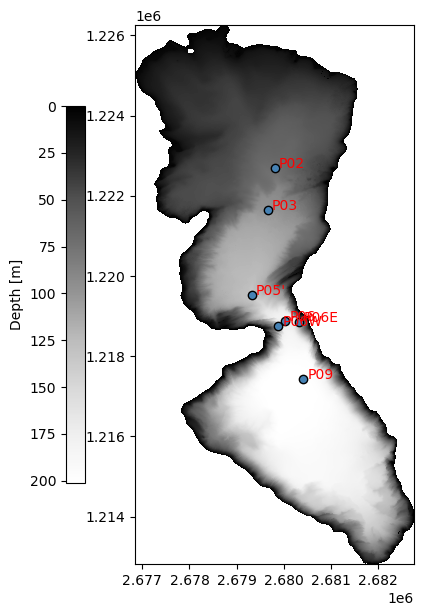

In [13]:
fig, ax = plt.subplots(figsize=(5, 7))

im = ax.pcolormesh(bathy['xsc'], bathy['ysc'], bathy['depth'], cmap='Greys_r', vmin=0)
cbar = fig.colorbar(im, shrink=0.7, label='Depth [m]', location='left', pad=0.13, ax=ax)
cbar.ax.invert_yaxis()

# profile locations
for _, p in profile_locs.iterrows():
    ax.scatter(p['xsc'], p['ysc'], c='steelblue', edgecolor='black', marker='o')
    ax.annotate(p['name'], (p['xsc'], p['ysc']), color='red', xytext=(3,0), textcoords='offset points')

plt.show()